<h1>1 Introduction

k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics. What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted.

We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

<h1>2 Loading data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import matplotlib.cm as cm
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [2]:
wines=pd.read_csv('./Wine.csv')

In [3]:
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


We don’t need the Customer_Segment column. As we have said before, k-means is an unsupervised machine learning algorithm and works with unlabeled data.

In [4]:
del wines['Customer_Segment']

<h1> 3 Data analysis

First we have to explore and visualize the data.

In [5]:
wines.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


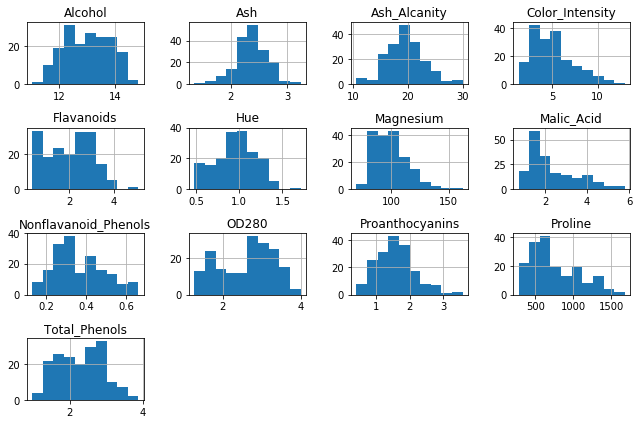

In [30]:
# Histogram for each Attribute
wines.hist(figsize=(9, 6));
plt.tight_layout()
plt.show()

What is the relationship between the different attributes? We can use the corrplot() function to create a graphical display of a correlation matrix.

In [7]:
from biokit.viz import corrplot

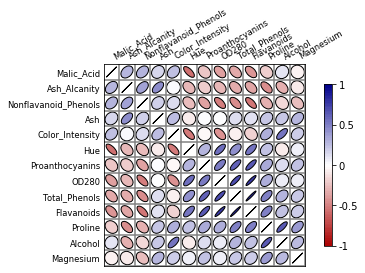

In [8]:
# Correlation matrix 
corr_wines=wines.corr()
c=corrplot.Corrplot(corr_wines)
c.plot()

There is a strong linear correlation between Total_Phenols and Flavanoids. We can model the relationship between these two variables.

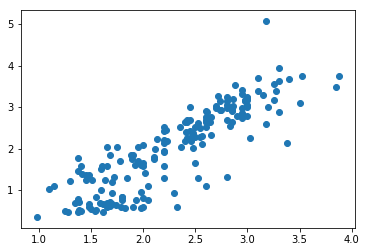

In [31]:
# Relationship between Phenols and Flavanoids
plt.scatter(wines['Total_Phenols'],wines['Flavanoids'])

Now that we have done a exploratory data analysis, we can prepare the data in order to execute the k-means algorithm.

<h1> 4 Data preparation

We have to normalize the variables to express them in the same range of values. In other words, normalization means adjusting values measured on different scales to a common scale.

In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(wines)

<h1> 5 k-means execution

In this section we are going to execute the k-means algorithm and analyze the main components that the function returns.

In [23]:
# Execution of k-means with k=2
kmeans = KMeans(n_clusters=2, random_state=10)
X_clustered = kmeans.fit_predict(X_std)

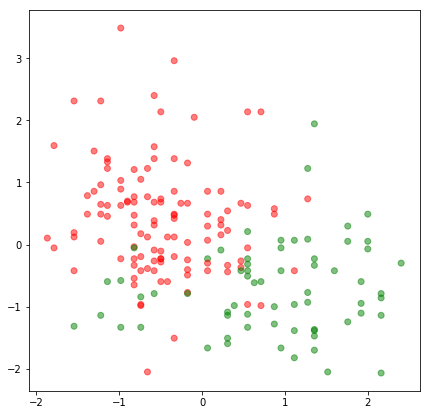

In [24]:
# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X_std[:,7],X_std[:,8], c= label_color, alpha=0.5) 
plt.show()

<h1> 6 How many clusters?

To study graphically which value of k gives us the best partition, we can plot SSE vs Choice of k.

<h2> エルボー法

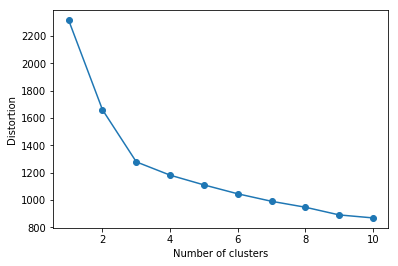

In [25]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(X_std)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
distortions

[2314.0,
 1658.7588524290954,
 1277.9284888446423,
 1175.705192819712,
 1110.6583456484896,
 1049.9335417811026,
 998.5223965310747,
 937.2829329007836,
 898.8265961958344,
 855.7884360699413]

SSEの変化が小さくなるクラスタ数2 or 3が最適値と推定

<h2> シルエット法

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

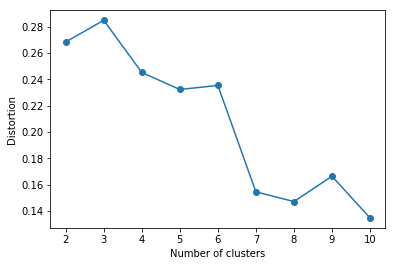

In [26]:
distortions = []
for i  in range(2,11):                # 1~10クラスタまで一気に計算 
    kmeans = KMeans(n_clusters=i, random_state=10)
    X_clustered = kmeans.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, X_clustered)
    distortions.append(silhouette_avg)   # km.fitするとkm.inertia_が得られる

plt.plot(range(2,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

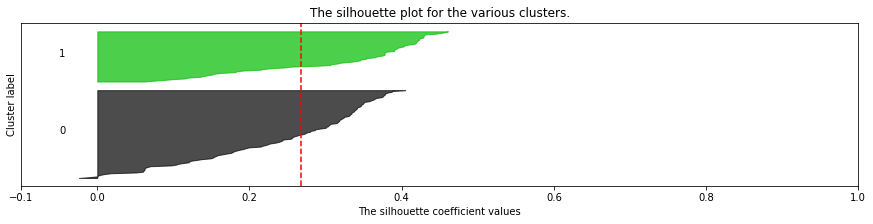

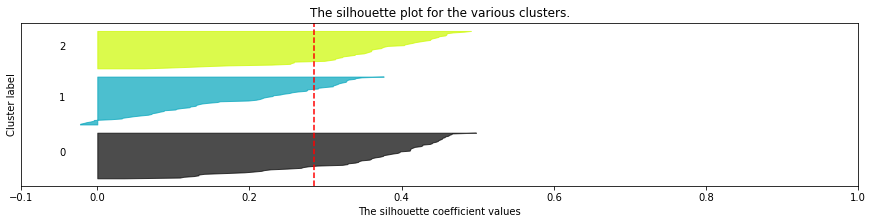

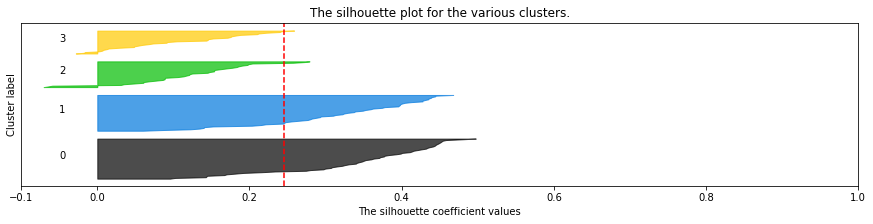

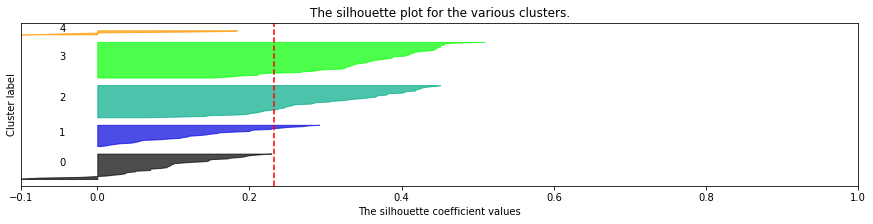

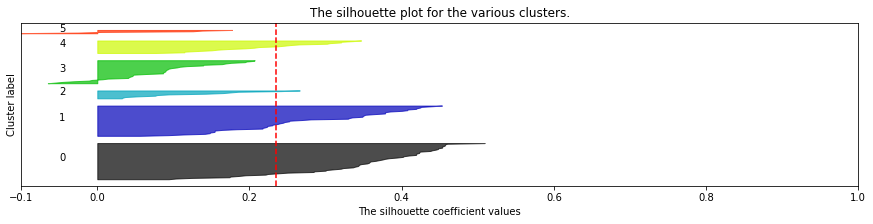

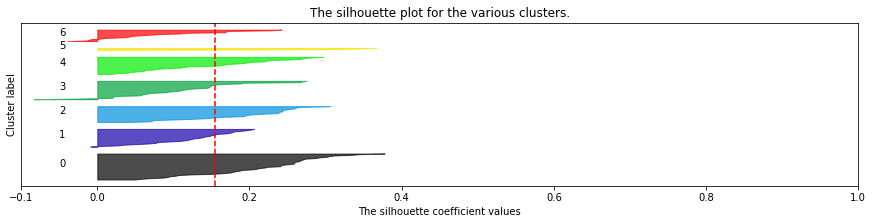

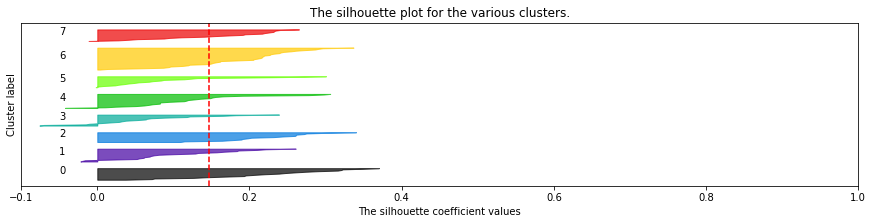

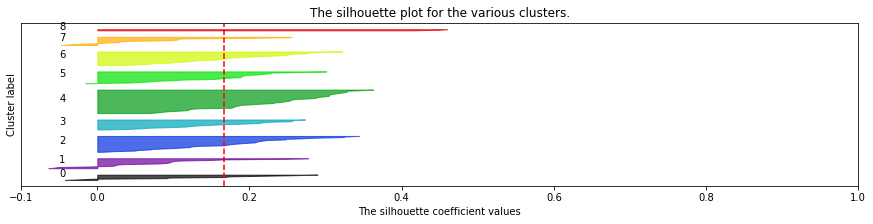

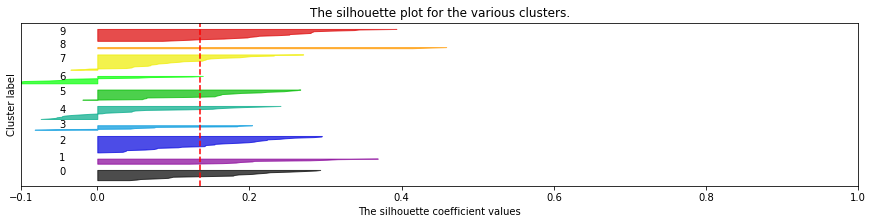

In [22]:
for n_clusters  in range(2,11):                # 1~10クラスタまで一気に計算
    # Create a subplot
    fig, ax1= plt.subplots(1,1)
    fig.set_size_inches(15, 3)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    X_clustered = kmeans.fit_predict(X_std)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, X_clustered)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, X_clustered)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[X_clustered == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #              "with n_clusters = %d" % n_clusters),
    #             fontsize=14, fontweight='bold')
     

クラスタ間のバランスがいいクラスタ数2 or 3が最適値と推定